In [1]:
%pylab inline
import numpy as np
import seaborn as sns
import pandas as pd
from metasense.epa import data as epa_data
from metasense.classifiers import *
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.cross_validation import train_test_split
from datetime import datetime
from IPython.display import HTML, Javascript, display
import GPy
sns.set_style('white')

Populating the interactive namespace from numpy and matplotlib


/home/sharad/workspace/research/metasense/venv/local/lib/python2.7/site-packages/GPy/util/linalg.py:48: UserWarning: warning: caught this exception:'module' object has no attribute '_dotblas'
  warnings.warn("warning: caught this exception:" + str(e))


In [27]:
def benchmark(cf):
    error = 0
    length = len(test)
    for i, x in enumerate(test.iterrows()):
        if i == length - 1:
            continue
        prediction = cf.predict(x)
        error += sum(test.iloc[i + 1] - prediction)**2
    return error

def predict(cf, X, l):
    error = 0
    length = len(X)
    prediction = []
    for i, x in enumerate(X.iterrows()):
        if i == 0:
            prediction.append(0.0)
            continue
        prediction.append(cf.predict(x)[l])
    prediction = np.array(prediction)
    series = pd.Series(prediction, index=X.index)
    return series

In [3]:
data = epa_data.load_pandas('../data')

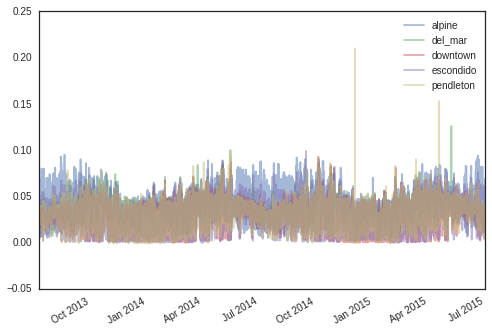

In [4]:
ozone_data = data['ozone'].dropna(thresh=15000, axis=1)
ozone_data = ozone_data.fillna(ozone_data.mean())
ozone_data.plot(alpha=0.5);
train, test = ozone_data.loc[:'2014-12-31 23:59:59'], ozone_data.loc['2015-01-01 00:00:00':]

In [6]:
cfs = {
    'Mean Classifier': MeanClassifier(),
    'Month Classifier': MonthClassifier(),
    'Linear Classifier': LinearClassifier(),
    'Lasso Classifier': LassoClassifier(alpha=0.000001),
    'Gaussian Process': GPClassifier(length_scale=0.001)
}
for name, cf in cfs.iteritems():
    cf.fit(train)
    print "%s: %f" % (name, benchmark(cf))

Month Classifier: 11.833923
Linear Classifier: 2.009783
Mean Classifier: 17.679889
Gaussian Process: 2.466061
Lasso Classifier: 1.951067


In [60]:
def plot(loc, start=0, end=20000):
    test[loc][start:end].plot(alpha=0.4)
    predict(cfs['Gaussian Process'], test, test.keys().tolist().index(loc))[start:end].plot(alpha=0.4, label='GP')
    predict(cfs['Month Classifier'], test, test.keys().tolist().index(loc))[start:end].plot(alpha=0.4, label='Month')

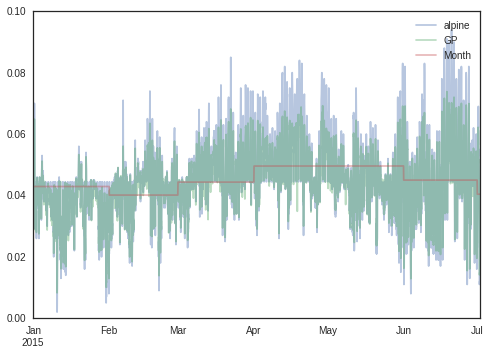

In [61]:
plot('alpine')
legend()